<a href="https://colab.research.google.com/github/MahmoudAlsayes/pythonProject/blob/master/06_transfer_learning_in_tensorflow_part_3_scaling_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with Tensorflow part 3 : Scaling up ()

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-09-12 10:23:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-09-12 10:23:44 (9.15 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:

from helper_functions import create_tensorboard_callback , plot_loss_curves , unzip_data,walk_through_dir,compare_historys,make_confusion_matrix




```
# This is formatted as code
```

## 101 Food Classes : working with less data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2024-09-12 10:23:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.207, 74.125.204.207, 64.233.187.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  23.9MB/s    in 68s     

2024-09-12 10:24:58 (22.9 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
unzip_data("/content/101_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("/content/101_food_classes_10_percent")

There are 2 directories and 0 images in '/content/101_food_classes_10_percent'.
There are 101 directories and 0 images in '/content/101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/pork_chop'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/beignets'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/poutine'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/greek_salad'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/panna_cotta'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/macarons'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/churros'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/cheese_plate'.
There are 0 directories and 250 images in '/content/101_

In [ ]:
train_dir="/content/101_food_classes_10_percent/train"
test_dir="/content/101_food_classes_10_percent/test"

In [ ]:
# Setup data
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_all_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=IMG_SIZE,
                                                               label_mode="categorical")
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=IMG_SIZE,
                                                              label_mode="categorical",
                                                              shuffle=False,)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


## Train a big dog model woth transfer learning


1.   Create ModelCheckPoint callback
2.   Create a data augmentation layer
3.   Build a headless
4.   compile our model
5.   Feature extract for 5 full passes


In [ ]:
# Create checkpoint callback
checkpoint_path="/content/101_food_classes_10_percent_data_model_checkpoint.weights.h5"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                       save_weights_only=True,
                                                       monitor="val_accuracy",
                                                       save_best_only=True)

In [ ]:
# Create data augmentation
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation=Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2),
    # layers.Rescaling(1/255) # use it if you use ResNet50
],name="data_augmentation")

In [ ]:
# Set up the base model and freeze its layer
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# Setup model architecture with trainable top layers
inputs=layers.Input(shape=(224,224,3),name="input_layer")

x=data_augmentation(inputs)
x=base_model(x,training=False)

x=layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)

# Outputs
outputs=layers.Dense(len(train_data_all_10_percent.class_names),activation="softmax" ,name="output_layer") (x)

model=tf.keras.Model(inputs,outputs)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Get a summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_avg_pool_layer                │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 101)                 │         129,381 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"]
              )

In [ ]:
# Fit
history_all_classes_10_percent=model.fit(train_data_all_10_percent,epochs=5,
          validation_data=test_data,
          callbacks=[checkpoint_callback])

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 151s 538ms/step - accuracy: 0.1306 - loss: 4.0702 - val_accuracy: 0.4218 - val_loss: 2.5696
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 112s 443ms/step - accuracy: 0.4012 - loss: 2.5940 - val_accuracy: 0.4818 - val_loss: 2.1348
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 153s 490ms/step - accuracy: 0.4834 - loss: 2.2073 - val_accuracy: 0.5068 - val_loss: 1.9649
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 90s 380ms/step - accuracy: 0.5287 - loss: 1.9644 - val_accuracy: 0.5189 - val_loss: 1.8798
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 166s 482ms/step - accuracy: 0.5555 - loss: 1.8145 - val_accuracy: 0.5324 - val_loss: 1.8171


In [ ]:
# Evaluate
feature_extraction_results=model.evaluate(test_data)
feature_extraction_results

790/790 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.5031 - loss: 1.9355


[1.8170621395111084, 0.5323960185050964]

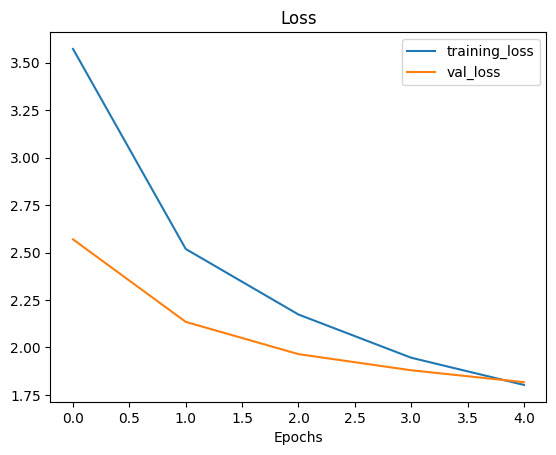

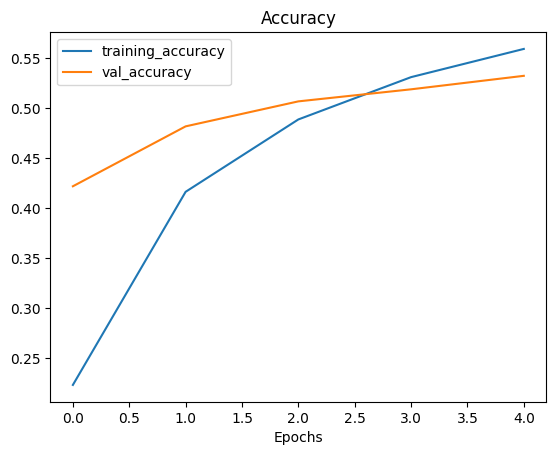

In [ ]:
plot_loss_curves(history_all_classes_10_percent)

## Fine tuning

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable=True

# Refreeze every layer except the last 5
for layer in base_model.layers[:-5]:
  layer.trainable=False

In [ ]:
# ReCompile model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
# What layers in the model are trainabel
for layer in model.layers:
  print(layer.name,layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_avg_pool_layer True
output_layer True


In [ ]:
# check whick layers are trainable in our base
for layer_number ,layer in enumerate(model.layers[2].layers):# ORRRRRRRRRRRR base_model.layers
  print(layer_number,layer.name,layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs=10 # model has alredy

# Fine-tune our model
history_all_classes_10_percent_fine_tune=model.fit(train_data_all_10_percent,
                                                   epochs=fine_tune_epochs,
                                                   validation_data=test_data,
                                                   initial_epoch=history_all_classes_10_percent.epoch[-1],
                                                   )

Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 129s 493ms/step - accuracy: 0.5651 - loss: 1.7969 - val_accuracy: 0.5508 - val_loss: 1.7402
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 118s 392ms/step - accuracy: 0.6109 - loss: 1.5649 - val_accuracy: 0.5565 - val_loss: 1.6977
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 173s 522ms/step - accuracy: 0.6195 - loss: 1.5066 - val_accuracy: 0.5650 - val_loss: 1.6674
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 122s 515ms/step - accuracy: 0.6543 - loss: 1.4092 - val_accuracy: 0.5695 - val_loss: 1.6428
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 134s 482ms/step - accuracy: 0.6655 - loss: 1.3405 - val_accuracy: 0.5730 - val_loss: 1.6242
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 117s 377ms/step - accuracy: 0.6824 - loss: 1.2854 - val_accuracy: 0.5775 - val_loss: 1.6084


In [ ]:
# Evaluate on the whole test
all_classes_10_percent_fine_tune_result=model.evaluate(test_data)
all_classes_10_percent_fine_tune_result

790/790 ━━━━━━━━━━━━━━━━━━━━ 62s 78ms/step - accuracy: 0.5538 - loss: 1.7029


[1.6083860397338867, 0.5775049328804016]

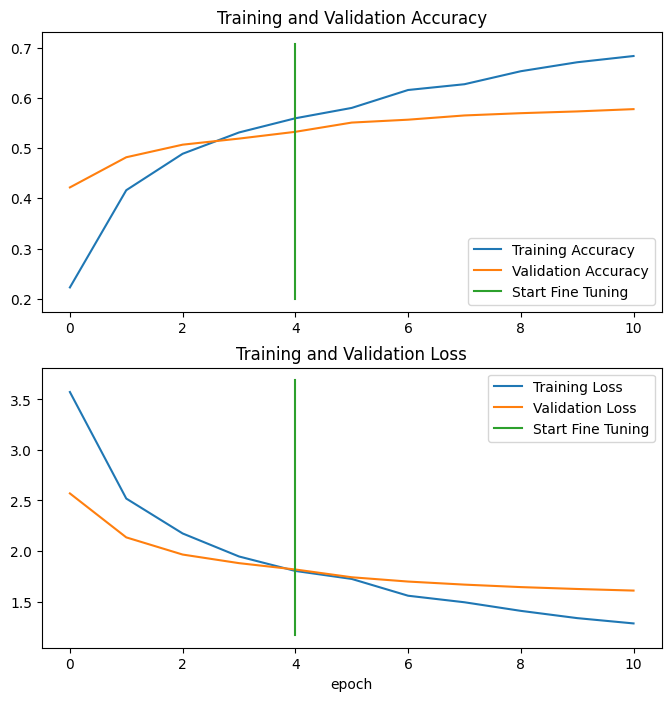

In [ ]:
# Compare the history
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

## Saving and loading the model


In [ ]:
model.save("101_food_classes_10_percent_saved_big_dog_model.keras")

In [ ]:
# save our fine_tune model
file_path="101_food_classes_10_percent_saved_big_dog_model"
model.export(file_path)

Saved artifact at '101_food_classes_10_percent_saved_big_dog_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 101), dtype=tf.float32, name=None)
Captures:
  135609852356816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135609852358048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135609852359280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135609852360512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135609852361568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135609852433104: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  135609852433984: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  135609852436272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135609852436976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135609852440320: TensorSpec(shape=

In [ ]:
# load and evaluate
import tensorflow as tf
load_model=tf.keras.models.load_model("101_food_classes_10_percent_saved_big_dog_model.keras")

In [ ]:
load_model

<Functional name=functional_1, built=True>

In [ ]:
# Evaluate model
loaded_model_results=load_model.evaluate(test_data)
loaded_model_results

790/790 ━━━━━━━━━━━━━━━━━━━━ 65s 77ms/step - accuracy: 0.5319 - loss: 1.7961


[1.6696391105651855, 0.5612673163414001]

In [ ]:
all_classes_10_percent_fine_tune_result

[1.6083860397338867, 0.5775049328804016]

## Evaluation the pefermance of the big model

In [ ]:
import tensorflow as tf
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

--2024-09-12 10:54:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.207, 64.233.188.207, 64.233.189.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M  12.2MB/s    in 3.6s    

2024-09-12 10:54:13 (12.2 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [ ]:
unzip_data("/content/06_101_food_class_10_percent_saved_big_dog_model.zip")

In [ ]:
loaded_model=tf.keras.models.load_model("/content/101_food_classes_10_percent_saved_big_dog_model.keras")

In [ ]:
# Evaluate
rsult_daonload_model=loaded_model.evaluate(test_data)


790/790 ━━━━━━━━━━━━━━━━━━━━ 66s 79ms/step - accuracy: 0.5319 - loss: 1.7961


In [ ]:
rsult_daonload_model

[1.6696391105651855, 0.5612673163414001]

## Making predictions

In [ ]:
# Make predicrion with model
preds_probs=model.predict(test_data,verbose=1)

790/790 ━━━━━━━━━━━━━━━━━━━━ 60s 72ms/step


In [ ]:
len(test_data)

790

In [ ]:
# How many prediction
len(preds_probs)

25250

In [ ]:
# What's the shape of our predictions?
preds_probs.shape

(25250, 101)

In [ ]:
# Let's see what the first 10 predictions look like
preds_probs[:10]

array([[3.4728640e-01, 1.1811279e-03, 1.9519530e-01, ..., 2.5440310e-04,
        2.5057851e-03, 2.1565806e-02],
       [8.3012640e-01, 2.4811061e-06, 3.2865477e-03, ..., 6.1376565e-03,
        5.2542255e-06, 1.5558091e-05],
       [3.0425468e-01, 2.8780492e-03, 3.8375510e-03, ..., 1.4271911e-03,
        1.4268147e-04, 9.6028351e-04],
       ...,
       [2.4001510e-01, 7.9322408e-06, 1.5374442e-03, ..., 3.8549088e-02,
        4.2375425e-04, 1.5564944e-04],
       [8.5295536e-02, 1.0865956e-03, 1.0466703e-01, ..., 2.0102202e-03,
        3.4482180e-04, 4.9934274e-04],
       [5.8743870e-01, 2.8531051e-05, 1.3207422e-03, ..., 8.5604703e-03,
        4.4434182e-05, 1.7805457e-03]], dtype=float32)

In [ ]:
# What does the first prediction probability array look like ?
preds_probs[0],len(preds_probs[0]),sum(preds_probs[0])

(array([3.47286403e-01, 1.18112785e-03, 1.95195302e-01, 6.64333697e-07,
        8.90153751e-06, 1.53821366e-05, 1.08179124e-03, 3.38058337e-04,
        5.04386611e-02, 1.12677296e-03, 2.13542116e-05, 6.27247355e-05,
        1.70709088e-03, 3.60909098e-06, 1.62094776e-02, 6.51257636e-04,
        4.29576176e-04, 3.66649986e-03, 1.53558631e-03, 1.38364594e-05,
        1.03062252e-03, 2.13674924e-04, 3.06624162e-04, 4.56042239e-04,
        1.10838341e-03, 3.49781272e-04, 1.10459665e-03, 7.54882931e-05,
        8.52037743e-02, 4.24198480e-03, 3.81918471e-05, 1.53250608e-03,
        1.81614677e-03, 2.52433911e-05, 6.14629779e-03, 5.55087972e-05,
        6.47275650e-04, 2.13946006e-03, 1.06976014e-02, 3.69334848e-05,
        5.39420580e-04, 2.64201692e-04, 3.88580863e-03, 2.11885963e-05,
        1.99506540e-04, 4.91896353e-04, 7.97287503e-04, 2.39710687e-04,
        2.18159385e-05, 5.21649187e-03, 3.69881233e-03, 5.61251618e-05,
        1.01570606e-01, 1.35229267e-02, 6.63559695e-06, 4.069759

In [ ]:
# We get one prediction probability per class ( in our case there's 101 prediction probability)
print(f"Number of prediction probability for sample 0 : {len(preds_probs[0])}")
print(f"What prediction probability sample 0  looks like: \n {preds_probs[0]}")
print(f"The class with the highest predicted pronanilitt by thr model for sample 0 : {preds_probs[0].argmax()}")

Number of prediction probability for sample 0 : 101
What prediction probability sample 0  looks like: 
 [3.47286403e-01 1.18112785e-03 1.95195302e-01 6.64333697e-07
 8.90153751e-06 1.53821366e-05 1.08179124e-03 3.38058337e-04
 5.04386611e-02 1.12677296e-03 2.13542116e-05 6.27247355e-05
 1.70709088e-03 3.60909098e-06 1.62094776e-02 6.51257636e-04
 4.29576176e-04 3.66649986e-03 1.53558631e-03 1.38364594e-05
 1.03062252e-03 2.13674924e-04 3.06624162e-04 4.56042239e-04
 1.10838341e-03 3.49781272e-04 1.10459665e-03 7.54882931e-05
 8.52037743e-02 4.24198480e-03 3.81918471e-05 1.53250608e-03
 1.81614677e-03 2.52433911e-05 6.14629779e-03 5.55087972e-05
 6.47275650e-04 2.13946006e-03 1.06976014e-02 3.69334848e-05
 5.39420580e-04 2.64201692e-04 3.88580863e-03 2.11885963e-05
 1.99506540e-04 4.91896353e-04 7.97287503e-04 2.39710687e-04
 2.18159385e-05 5.21649187e-03 3.69881233e-03 5.61251618e-05
 1.01570606e-01 1.35229267e-02 6.63559695e-06 4.06975970e-02
 2.02743430e-03 8.53871519e-04 1.20823383e

In [ ]:
test_data.class_names[0]

'apple_pie'

In [ ]:
# Get the pred classes of eatch label
pred_classes=preds_probs.argmax(axis=1)
pred_classes[:10]

array([ 0,  0,  0, 34,  8, 78, 29, 46, 85,  0])

In [ ]:
# How many pred classes do we have ?
len(pred_classes)

25250

In [ ]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

In [ ]:
# To get our test labels we need to unravel our test_data BatchDataset
y_labels=[]
for images,labels  in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

y_labels[:10] # Look for the first 10


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_labels[249] # Look for the first 10


0

In [ ]:
# How many y_labels are there ?
len(y_labels)

25250

# Evaluating our model's predictions

In [ ]:
rsult_daonload_model

[1.6696391105651855, 0.5612673163414001]

In [ ]:
# Let's try scikit-learn's accuracy
from sklearn.metrics import accuracy_score
sklearn_accuracy =accuracy_score(y_true=y_labels,
                                 y_pred=pred_classes)

In [ ]:
sklearn_accuracy

0.5775049504950495

## Let's make a confusion matrix

In [ ]:
# Get a list of class names
class_names=test_data.class_names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
# We need to make some
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Change (plotx-labels) ###
  plt.xticks(rotation=70,fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")


In [ ]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100,100),
                      text_size=20,
                      savefig=True
                      )

## Let's keep the evaluation train goin, time for a classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.28      0.16      0.21       250
           1       0.49      0.70      0.57       250
           2       0.58      0.60      0.59       250
           3       0.82      0.48      0.60       250
           4       0.47      0.48      0.48       250
           5       0.39      0.37      0.38       250
           6       0.74      0.75      0.75       250
           7       0.78      0.72      0.75       250
           8       0.25      0.53      0.34       250
           9       0.38      0.60      0.47       250
          10       0.43      0.43      0.43       250
          11       0.71      0.54      0.62       250
          12       0.72      0.54      0.62       250
          13       0.47      0.59      0.53       250
          14       0.55      0.50      0.52       250
          15       0.36      0.36      0.36       250
          16       0.65      0.50      0.57       250
          17       0.40    

In [ ]:
# Get a directory of the classification report
classification_report_dic=classification_report(y_labels,pred_classes,output_dict=True)

In [ ]:
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
# Create empti dictinary
class_f1_scores={}

for k , v in classification_report_dic.items():
  if k=="accuracy" :
    break
  else:
    # Add class names
    class_f1_scores[class_names[int(k)]]=v["f1-score"]
class_f1_scores


{'apple_pie': 0.20759493670886076,
 'baby_back_ribs': 0.5737704918032787,
 'baklava': 0.5889328063241106,
 'beef_carpaccio': 0.6045340050377833,
 'beef_tartare': 0.4752475247524752,
 'beet_salad': 0.3827160493827161,
 'beignets': 0.7475149105367794,
 'bibimbap': 0.7525987525987526,
 'bread_pudding': 0.3441138421733506,
 'breakfast_burrito': 0.46604938271604934,
 'bruschetta': 0.432,
 'caesar_salad': 0.6150341685649202,
 'cannoli': 0.6181818181818182,
 'caprese_salad': 0.5266903914590747,
 'carrot_cake': 0.5219206680584552,
 'ceviche': 0.3596837944664032,
 'cheese_plate': 0.5688487584650113,
 'cheesecake': 0.42026266416510316,
 'chicken_curry': 0.4412371134020618,
 'chicken_quesadilla': 0.5714285714285715,
 'chicken_wings': 0.6735042735042736,
 'chocolate_cake': 0.47715736040609136,
 'chocolate_mousse': 0.3356009070294785,
 'churros': 0.7477876106194691,
 'clam_chowder': 0.6942148760330579,
 'club_sandwich': 0.670756646216769,
 'crab_cakes': 0.38344226579520696,
 'creme_brulee': 0.72015

In [ ]:
# turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores =pd.DataFrame({"class_names":list(class_f1_scores.keys()),
                         "f1-score":list(class_f1_scores.values())}).sort_values("f1-score",ascending=False)

In [ ]:
f1_scores

class_names  f1-score
33           edamame  0.951644
63          macarons  0.840449
75               pho  0.827309
86           sashimi  0.817121
65           mussels  0.810700
..               ...       ...
56  huevos_rancheros  0.317627
93             steak  0.310204
82           ravioli  0.307692
99      tuna_tartare  0.285714
0          apple_pie  0.207595

[101 rows x 2 columns]

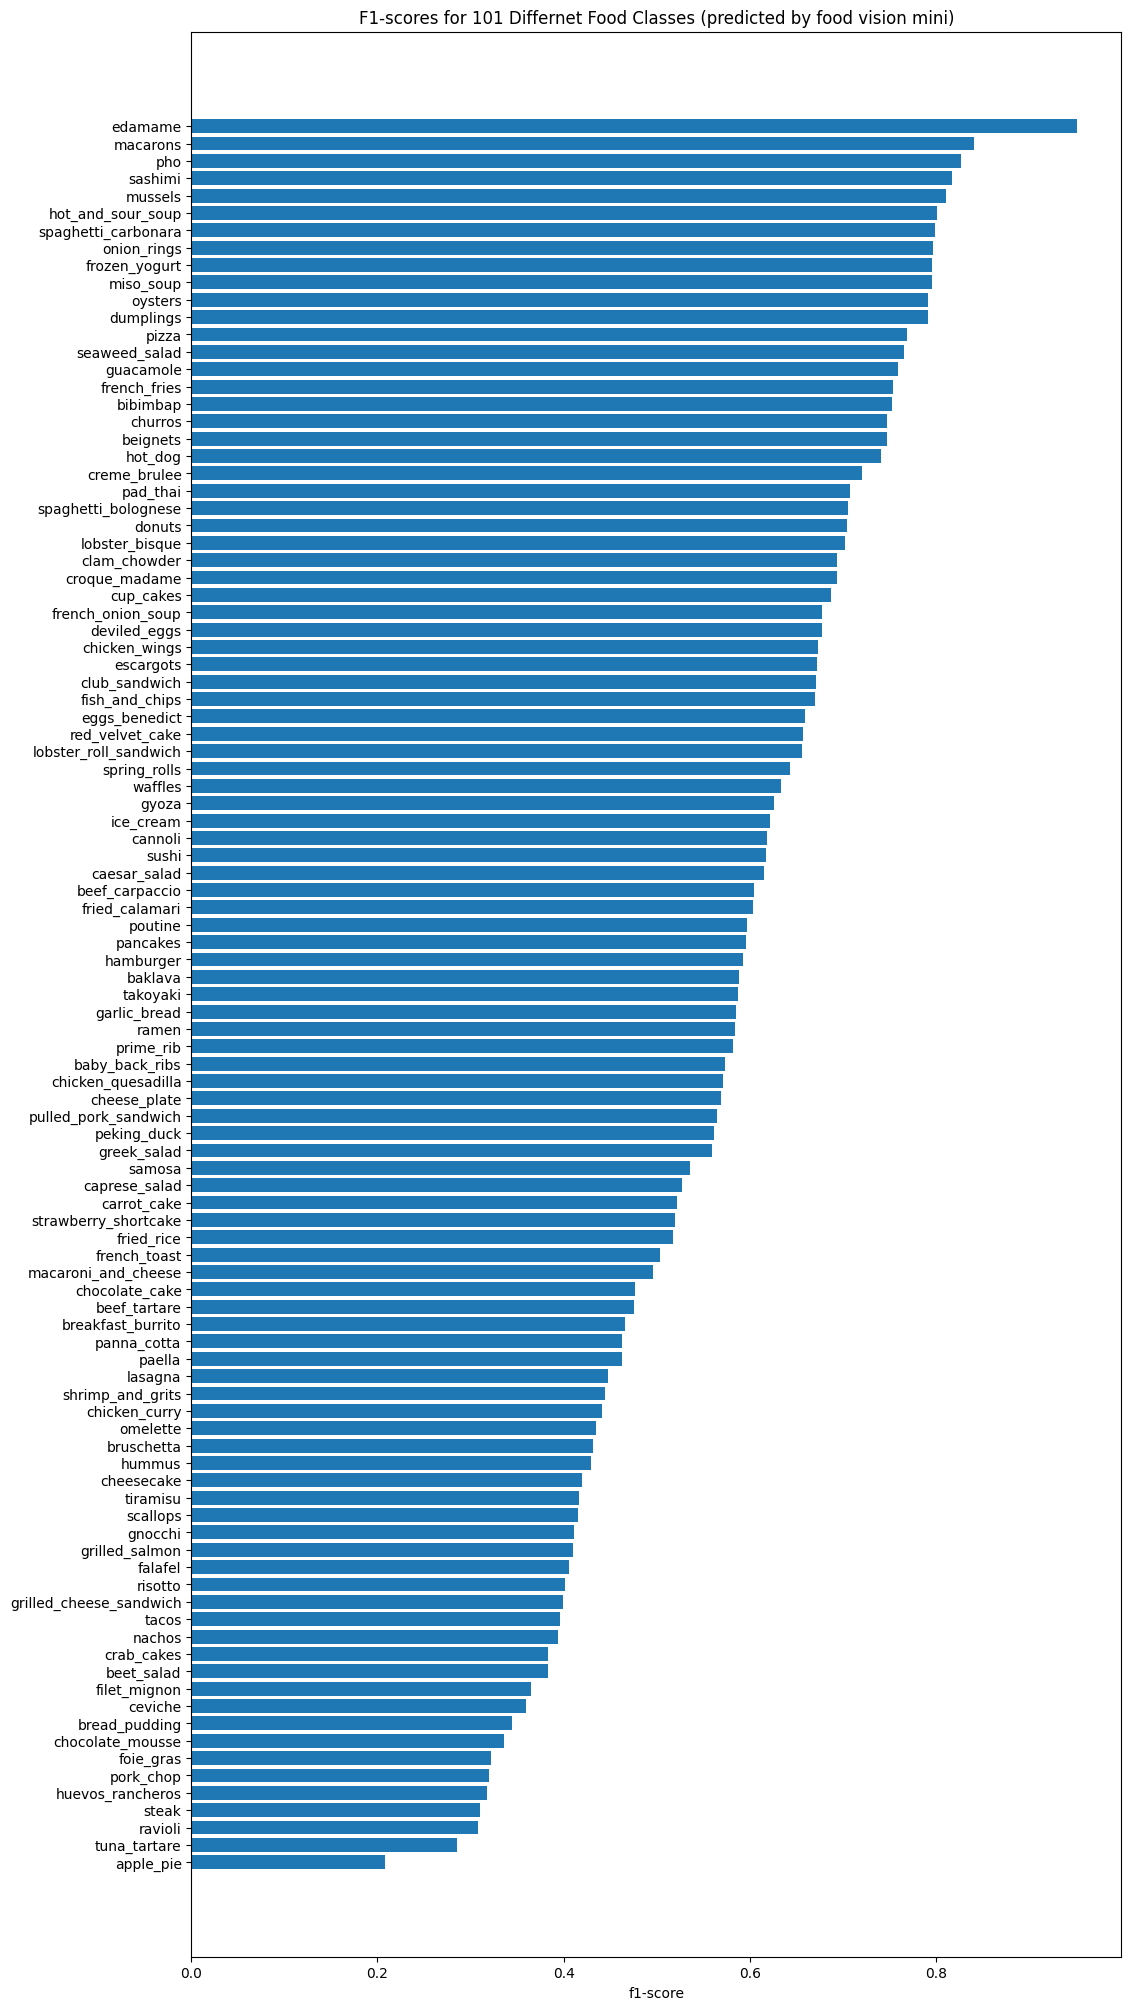

In [ ]:
import matplotlib.pyplot as plt
fig , ax= plt.subplots(figsize=(12,25))
scores=ax.barh(range(len(f1_scores)),f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("f1-score")
ax.set_title("F1-scores for 101 Differnet Food Classes (predicted by food vision mini)")
ax.invert_yaxis()
#

## Visualizing predictions on custom image

*   read fiel
*   turn image to tensor
*   Resize the image tensor to be the same size as the images
*   scale the image to get all the pixel values between 0&1



In [ ]:
# Create a function to load and prepare images
def load_and_prep_image(filename,img_shape=224,scale=True):
  """
  read in an image from filename , turns it into a tensor and reshape into specified shape (img_shape,img_shape,color_channels=3).
  Arg:
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True

  """
  # Read in the image
  img=tf.io.read_file(filename)

  # Decode image into tensor
  img=tf.io.decode_image(img,channels=3) # if it was a JPG it contain 4 channels soooo we convert to 3 channels

  # Resize the image
  img=tf.image.resize(img,[img_shape,img_shape])

  # Scale ? yes/no
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale images for EfficientNet models in tensorflow




*   Load few random images from the test dataset

*   Make a predictions on the loaded images
*   plot the original image(s) along with the model's



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


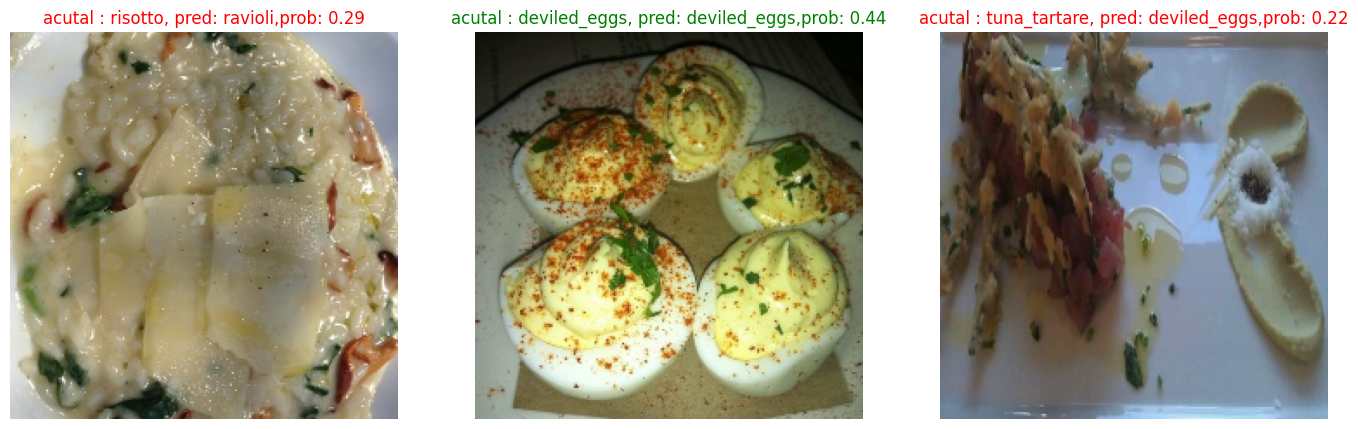

In [ ]:
# Make pred on a series of randm images
import os
import random
plt.figure(figsize=(17,10))
for i in range(3):
  # Choose a random image from a random class
  class_name=random.choice(class_names)
  filename=random.choice(os.listdir(test_dir+"/"+class_name))
  filepath=test_dir+"/"+class_name+"/"+filename

  # Load the image and male predictions
  img=load_and_prep_image(filepath,scale=False)
  # print(img.shape)
  img_expanded=tf.expand_dims(img,axis=0)
  # print(img_expanded.shape)
  pred_prob=model.predict(img_expanded) # get predicition probabilities array
  pred_class=class_names[pred_prob.argmax()] # get highest prediction probability
  # print(prep_prob)
  # print(pred_class)

  # plot the image
  plt.subplot(1,3,i+1)
  plt.imshow(img/255)
  if class_name==pred_class: # if predicted class matches truth class ,make test
    title_color="g"
  else :
    title_color="r"
  plt.title(f"acutal : {class_name}, pred: {pred_class},prob: {pred_prob.max():.2f}",c=title_color)
  plt.axis(False);


## Finding the most wrong predictions



In [ ]:
# Get all of the image file pahts in the test dataset
filepaths=[]
for filepath in test_data.list_files("/content/101_food_classes_10_percent/test/*/*.jpg",shuffle=False):
  filepaths.append(filepath.numpy())

filepaths[:10]

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [ ]:
# 2. Create a DataFrame of different oarameters for each of our test images
import pandas as pd
pred_df=pd.DataFrame({"img_path" : filepaths,
                      "y_true":y_labels,
                      "y_pred":pred_classes,
                      "pred_conf" : preds_probs.max(axis=1,),
                      "y_true_classname": [class_names[i]for i in y_labels],
                      "y_pred_classname": [class_names[i]for i in pred_classes]})
pred_df

img_path  y_true  y_pred  \
0      b'/content/101_food_classes_10_percent/test/ap...       0       0   
1      b'/content/101_food_classes_10_percent/test/ap...       0       0   
2      b'/content/101_food_classes_10_percent/test/ap...       0       0   
3      b'/content/101_food_classes_10_percent/test/ap...       0      34   
4      b'/content/101_food_classes_10_percent/test/ap...       0       8   
...                                                  ...     ...     ...   
25245  b'/content/101_food_classes_10_percent/test/wa...     100     100   
25246  b'/content/101_food_classes_10_percent/test/wa...     100     100   
25247  b'/content/101_food_classes_10_percent/test/wa...     100      56   
25248  b'/content/101_food_classes_10_percent/test/wa...     100     100   
25249  b'/content/101_food_classes_10_percent/test/wa...     100     100   

       pred_conf y_true_classname  y_pred_classname  
0       0.347286        apple_pie         apple_pie  
1       0.830126        apple_pie         apple_pie  
2       0.304255        apple_pie         apple_pie  
3       0.137146        apple_pie     eggs_benedict  
4       0.346723        apple_pie     bread_pudding  
...          ...              ...               ...  
25245   0.943988          waffles           waffles  
25246   0.942027          waffles           waffles  
25247   0.645483          waffles  huevos_rancheros  
25248   0.295057          waffles           waffles  
25249   0.375679          waffles           waffles  

[25250 rows x 6 columns]

In [ ]:
# 3. Find out in our Dataframe which predictions are wrong
pred_df["pred_correct"] =pred_df["y_true"] == pred_df["y_pred"]
pred_df

img_path  y_true  y_pred  \
0      b'/content/101_food_classes_10_percent/test/ap...       0       0   
1      b'/content/101_food_classes_10_percent/test/ap...       0       0   
2      b'/content/101_food_classes_10_percent/test/ap...       0       0   
3      b'/content/101_food_classes_10_percent/test/ap...       0      34   
4      b'/content/101_food_classes_10_percent/test/ap...       0       8   
...                                                  ...     ...     ...   
25245  b'/content/101_food_classes_10_percent/test/wa...     100     100   
25246  b'/content/101_food_classes_10_percent/test/wa...     100     100   
25247  b'/content/101_food_classes_10_percent/test/wa...     100      56   
25248  b'/content/101_food_classes_10_percent/test/wa...     100     100   
25249  b'/content/101_food_classes_10_percent/test/wa...     100     100   

       pred_conf y_true_classname  y_pred_classname  pred_correct  
0       0.347286        apple_pie         apple_pie          True  
1       0.830126        apple_pie         apple_pie          True  
2       0.304255        apple_pie         apple_pie          True  
3       0.137146        apple_pie     eggs_benedict         False  
4       0.346723        apple_pie     bread_pudding         False  
...          ...              ...               ...           ...  
25245   0.943988          waffles           waffles          True  
25246   0.942027          waffles           waffles          True  
25247   0.645483          waffles  huevos_rancheros         False  
25248   0.295057          waffles           waffles          True  
25249   0.375679          waffles           waffles          True  

[25250 rows x 7 columns]

In [ ]:
# 4. Cort DataFrame to have most wrong predictions at the top
top_100_wrong=pred_df[pred_df["pred_correct"]==False].sort_values("pred_conf",ascending=False)[:100]
top_100_wrong

img_path  y_true  y_pred  \
23631  b'/content/101_food_classes_10_percent/test/st...      94      83   
10847  b'/content/101_food_classes_10_percent/test/fr...      43      68   
23797  b'/content/101_food_classes_10_percent/test/su...      95      86   
15826  b'/content/101_food_classes_10_percent/test/ma...      63      29   
22044  b'/content/101_food_classes_10_percent/test/se...      88       5   
...                                                  ...     ...     ...   
717    b'/content/101_food_classes_10_percent/test/ba...       2     100   
9184   b'/content/101_food_classes_10_percent/test/fa...      36      31   
20094  b'/content/101_food_classes_10_percent/test/pu...      80      53   
8008   b'/content/101_food_classes_10_percent/test/du...      32      34   
17302  b'/content/101_food_classes_10_percent/test/oy...      69      65   

       pred_conf      y_true_classname y_pred_classname  pred_correct  
23631   0.999579  strawberry_shortcake  red_velvet_cake         False  
10847   0.993146        fried_calamari      onion_rings         False  
23797   0.992016                 sushi          sashimi         False  
15826   0.989640              macarons        cup_cakes         False  
22044   0.989268         seaweed_salad       beet_salad         False  
...          ...                   ...              ...           ...  
717     0.937909               baklava          waffles         False  
9184    0.937382               falafel           donuts         False  
20094   0.937125  pulled_pork_sandwich        hamburger         False  
8008    0.937067             dumplings    eggs_benedict         False  
17302   0.936703               oysters          mussels         False  

[100 rows x 7 columns]

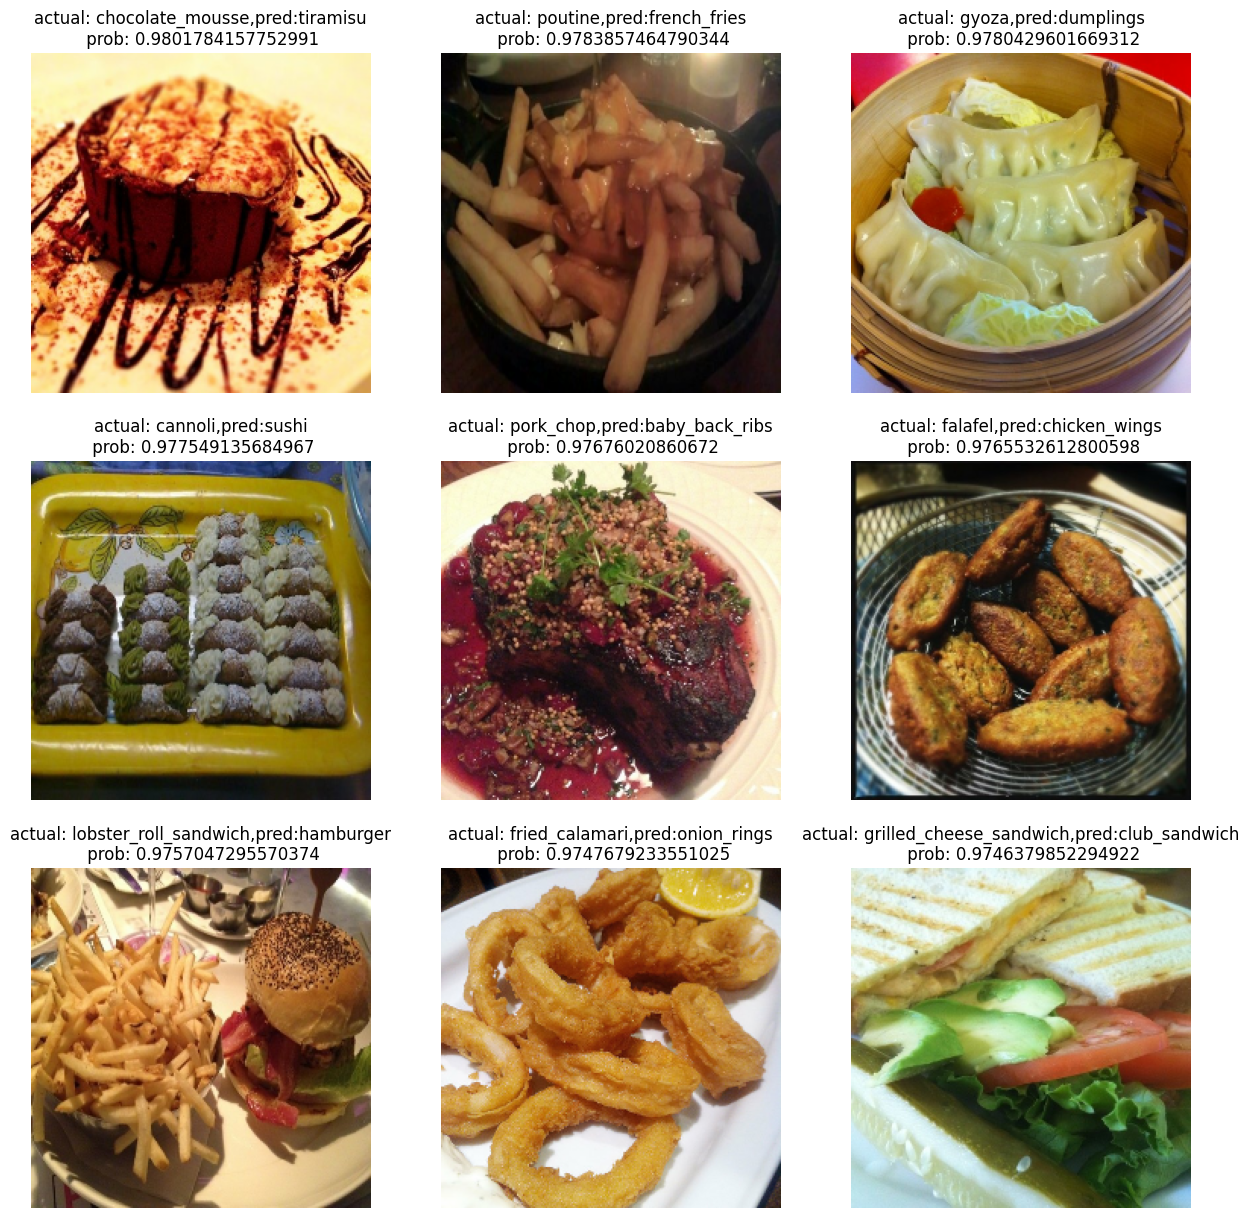

In [ ]:
# 5. Visualize the test data samples which have the wrong prediction but highest pred probabilty
images_to_view=9
start_index=10
plt.figure(figsize=(15,15))
for i , row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3,3,i+1)
  img=load_and_prep_image(row[1],scale=False)
  _,_,_,_,pred_prob,y_true_classname,y_pred_classname,_=row # Only  interested in a few parameters of eatch row
  plt.imshow(img/255)
  plt.title(f"actual: {y_true_classname},pred:{y_pred_classname}\n prob: {pred_prob}")
  # plt.axis(False)
  plt.gca().set_axis_off()  # Disable axis with an explicit call to the current axis object


# Test out the big dog our own custom images

In [ ]:
# Get custom images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

--2024-09-12 12:24:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 64.233.189.207, 108.177.97.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip’

custom_food_images. 100%[===================>]  12.58M  9.46MB/s    in 1.3s    

2024-09-12 12:24:55 (9.46 MB/s) - ‘custom_food_images.zip’ saved [13192985/13192985]



In [ ]:
unzip_data("custom_food_images.zip")

In [ ]:
# Get the custom food images
custom_food_images=["custom_food_images/" + img_path for img_path in os.listdir("custom_food_images")]
custom_food_images

['custom_food_images/ramen.jpeg',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/chicken_wings.jpeg',
 'custom_food_images/sushi.jpeg',
 'custom_food_images/pizza-dad.jpeg',
 'custom_food_images/steak.jpeg']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


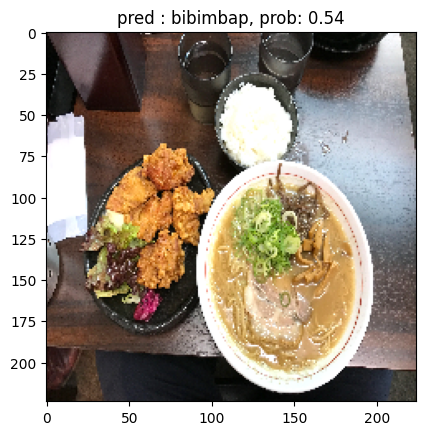

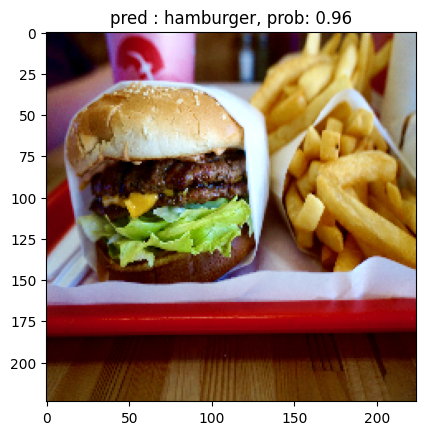

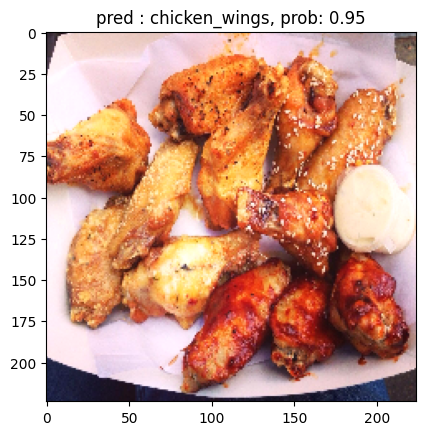

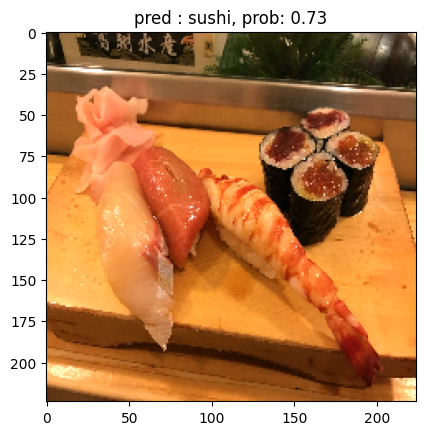

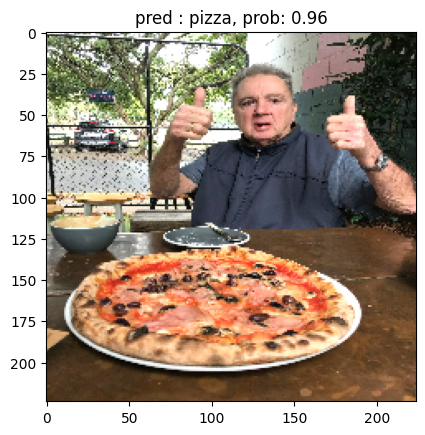

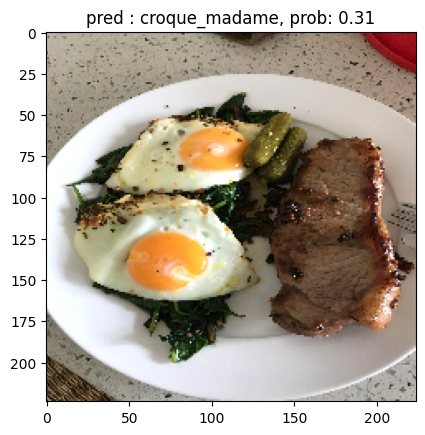

In [ ]:
# Make polt
for img in custom_food_images:
  img=load_and_prep_image(img,scale=False) # Don't need to scale
  pred_prob=model.predict(tf.expand_dims(img,axis=0)) # Make prediction on image with shape [1,224,224,3] (same shape as )
  pred_class=class_names[pred_prob.argmax()] # get the index with the highet prediction

  # plot the appropriate information
  plt.figure()
  plt.imshow(img/225)
  plt.title(f"pred : {pred_class}, prob: {pred_prob.max():.2f}")
